In [1]:
import json
import urllib2
import requests
from steamusers import users #steamusers.py contains a dictionary called users which includes the the initials of the users and 
#their steamID. Not included in this respository 

key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' #steam api key

output = {}

with open("steamfriends.json", "w") as outfile:
    for user in users:
        user_id = users[user] #user_id is assigned the steamID for that user
        response = requests.get('http://api.steampowered.com/IPlayerService/GetOwnedGames/v0001/?key=%s&steamid=%s&include_appinfo=1&format=json' % (key, user_id))
        response_json = response.json()
        output[user] = response_json #add the json as a value with the username as a dey to the output directory
    json.dump(output, outfile) #dump the output directory to steamfriends.json

In [2]:
with open('steamfriends.json') as data_file:    
    data = json.load(data_file) #read in the data

In [3]:
games_count_list = []
user_list = []
total_time_list = []
total_games = 0
total_time = 0

for user in data:
    user_list.append(user) #append username (initials) to user_list
    games = data[user]["response"]["game_count"] #locate game count
    games_count_list.append(games) #append game count to list
    total_games += int(games) #increment total game count (total games of all users combined)
    game_time = 0
    for game in data[user]["response"]["games"]: #for each game owned
        game_time += game["playtime_forever"] #increment game_time by the amount of time this game has been played
    total_time_list.append(game_time)
    total_time += game_time

game_percent = [ (float(game)/total_games)*100 for game in games_count_list] #convert each figure to a percent out of 100 for pie chart
total_time_list = [ float(time)/60 for time in total_time_list] #convert each time to hours
total_time_in_hours = float(total_time)/60 

time_percent = [(time/total_time) * 100 for time in total_time_list]
hours = int(total_time/60)
mins = total_time%60
days = int(hours/24)
hours = hours%24
print "%ddays, %dhours, %dmins" % (days, hours, mins)

259days, 6hours, 57mins


In [4]:
#print off each user total game time in hours
for i in range(len(user_list)):
    print "%s: %.2f" % (user_list[i], total_time_list[i])
print "%.2f" % total_time_in_hours

BC: 928.03
DD: 1211.90
BK: 993.80
Maniacalbrain: 763.42
PH: 579.13
TD: 1746.67
6222.95


Populating the interactive namespace from numpy and matplotlib


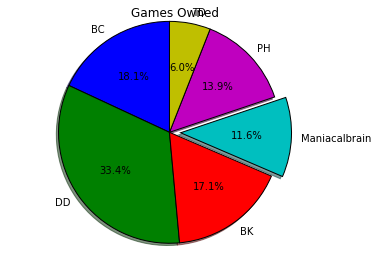

In [5]:
import matplotlib.pyplot as plt
%pylab inline

explode = (0, 0, 0, 0.1, 0, 0) #explode my slice as this occurs at index 3 

plt.pie(game_percent, explode=explode, labels=user_list, 
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal') #removing this creates an ellipse
plt.title('Games Owned')

plt.show()

In [6]:
games_over_0_list = []
total_games_over_0 = 0
for user in data:
    game_over_0 = 0
    for game in data[user]["response"]["games"]: #for each game the user owns, increment game_over_0 if it has a time of more than zero (ie, if it has been played)
        if game["playtime_forever"] > 0:
            game_over_0 += 1
    games_over_0_list.append(game_over_0)
    total_games_over_0 += game_over_0

for i in range(len(user_list)):
    print user_list[i], games_over_0_list[i],"/",games_count_list[i]
    #print each users name, total games played/total games owned

BC 44 / 112
DD 93 / 207
BK 77 / 106
Maniacalbrain 47 / 72
PH 44 / 86
TD 24 / 37


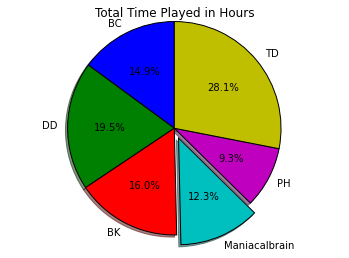

In [7]:
explode = (0, 0, 0, 0.1, 0, 0)

plt.pie(time_percent, explode=explode, labels=user_list, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Total Time Played in Hours')

plt.show()

In [8]:
#If a game has not been played in the past 2 weeks there will be no "playtime_2weeks" field. "if game["playtime_2weeks"]:" will 
#throw an error if the game has not been played.
two_week_count = []
two_week_total = 0

for user in data:
    two_week = 0
    for game in data[user]["response"]["games"]: #for each game the user owns
        
        try:
            if game["playtime_2weeks"]: 
                two_week += game["playtime_2weeks"]
                
        except Exception:
            continue #only works becaue we are inside a for loop. If doing this on only one users data use pass instead    
    
        
    two_week_count.append(two_week)
    two_week_total += two_week

In [9]:
two_week_count

[966, 0, 1, 946, 0, 3951]

Populating the interactive namespace from numpy and matplotlib


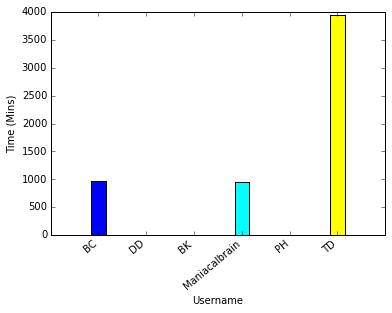

In [10]:
import matplotlib.pyplot as plt
%pylab inline

N=6 #len(two_week_count)
width = 0.30 # the width of the bars
ind = np.arange(N) - (width/2)   # the x locations for the bars
       

colors = ['blue', 'green', 'red', 'cyan', 'purple', 'yellow'] #copied from the pie charts above
time = two_week_count

fig, ax = plt.subplots()

ax.bar(ind, time, width, color = colors)

ax.set_ylabel("Time (Mins)")
ax.set_xlabel("Username")
ax.set_xticks(ind + width/2)
ax.set_xticklabels( user_list, rotation=40, ha='right' ) 



In [11]:
import pandas as pd

user_colors = {
    "PH": "purple",
    "DD" : "green",
    "BK" : "red",
    "TD" : "yellow",
    "BC" : "blue",
    "Maniacalbrain" : "cyan" 
}

game_DB = pd.DataFrame(columns = ["User", "Game", "Time Played", "Color"])



In [12]:
for user in data:
    for game in data[user]["response"]["games"]:
        if game["playtime_forever"] > 0:
            name = game["name"].encode('utf8')
            if ":" in name: #colons removed as they cause an error in bokah plotting
                name = name.replace(":", "")
            new_row = [user, name, game["playtime_forever"], user_colors[user]]
            game_DB.loc[len(game_DB)] = new_row
            
            
game_DB.head()            

,User,Game,Time Played,Color
0,BC,Half-Life,59,blue
1,BC,Half-Life 2,11,blue
2,BC,Counter-Strike Source,72,blue
3,BC,Half-Life 2 Deathmatch,71,blue
4,BC,Garry's Mod,17136,blue


In [13]:
total = game_DB["Time Played"].sum()
print '%.0f' % total
average = int(total/len(game_DB))

373377


In [14]:
game_DB_plus_averages = game_DB.copy() #create a second dataframe that will hold each user average, total average and median

# take ith user, ith time from tota_time_list and devide by number of games over 0 mins played by ith user
for i in range(len(user_list)):
    new_row = [user_list[i], user_list[i]+"'s_average", (total_time_list[i]*60)/games_over_0_list[i], "black"]
    game_DB_plus_averages.loc[len(game_DB_plus_averages)] = new_row

#calculate total average    
new_row =["Total", "Total_average", total_time/total_games_over_0, "black"]
game_DB_plus_averages.loc[len(game_DB_plus_averages)] = new_row
print new_row

#order and reindex game_DB to find median
game_DB = game_DB.sort(["Time Played"], ascending=True)
game_DB = game_DB.reset_index(drop=True)


median = game_DB.loc[len(game_DB)/2]
new_row=["Median", "Median", (median["Time Played"]), "black"]
game_DB_plus_averages.loc[len(game_DB_plus_averages)] = new_row
print new_row
print median

['Total', 'Total_average', 1134, 'black']
['Median', 'Median', 208.0, 'black']
User                                     BC
Game           Assassin's Creed Revelations
Time Played                             208
Color                                  blue
Name: 164, dtype: object


In [15]:
game_DB_plus_averages = game_DB_plus_averages.sort(["Time Played"], ascending=True) #order dataframe

(0.0, 36678.0, 0.0, 336.5)

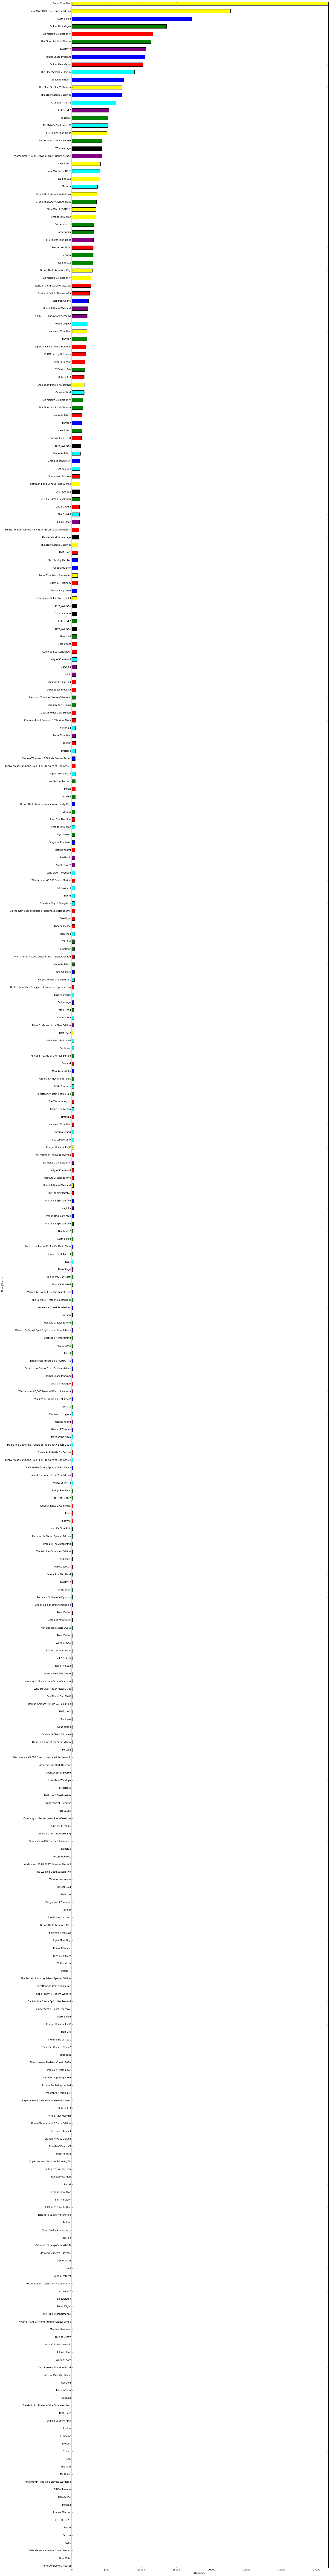

In [16]:
N=len(game_DB_plus_averages)
width = .5 # the width of the bars
ind = np.arange(N)   # the x locations for the groups
       
fig = plt.figure(figsize=(20,200))
ax = fig.add_subplot(111)

ax.barh(ind, game_DB_plus_averages["Time Played"], width, color = game_DB_plus_averages["Color"])


ax.set_ylabel("Time (Hours)")
ax.set_xlabel("Username")
ax.set_yticks(ind + width/2)
ax.grid(False)

labels = []
for name in game_DB_plus_averages["Game"]:
    labels.append(name.decode('utf8').strip())
    
ax.set_yticklabels( labels )

plt.axis('tight')

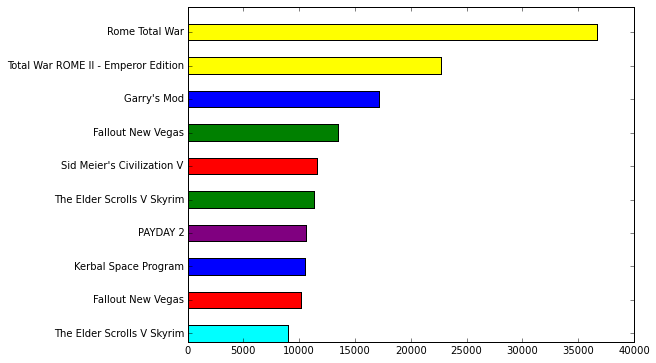

In [17]:
N=len(game_DB.tail(10)) 
width = .5 # the width of the bars
ind = np.arange(N)   # the x locations for the groups
       

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.barh(ind, game_DB["Time Played"].tail(10), width, color = game_DB["Color"].tail(10))


ax.set_yticks(np.arange(N) + width/2)

labels = []
for name in game_DB["Game"].tail(10):
    labels.append(name)

ax.set_yticklabels( labels )

(array([ 252.,   22.,   12.,    8.,   11.,    6.,    1.,    3.,    1.,
           2.,    1.,    0.,    1.,    1.,    2.,    2.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   7.34540000e+02,   1.46808000e+03,
          2.20162000e+03,   2.93516000e+03,   3.66870000e+03,
          4.40224000e+03,   5.13578000e+03,   5.86932000e+03,
          6.60286000e+03,   7.33640000e+03,   8.06994000e+03,
          8.80348000e+03,   9.53702000e+03,   1.02705600e+04,
          1.10041000e+04,   1.17376400e+04,   1.24711800e+04,
          1.32047200e+04,   1.39382600e+04,   1.46718000e+04,
          1.54053400e+04,   1.61388800e+04,   1.68724200e+04,
          1.76059600e+04,   1.83395000e+04,   1.90730400e+04,
          1.98065800e+04,   2.05401200e+04

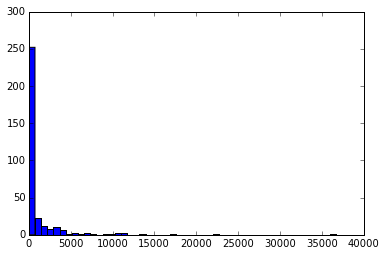

In [18]:
plt.hist(game_DB['Time Played'], bins=50)


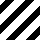
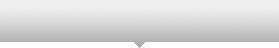
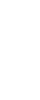
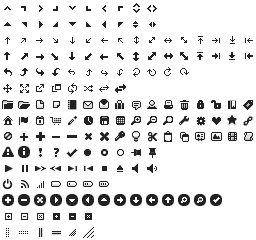
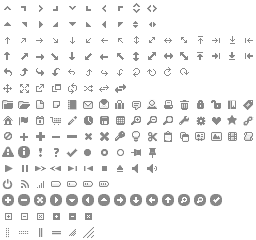
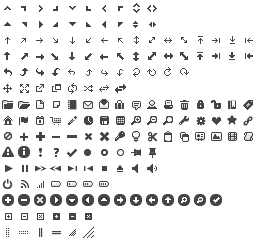
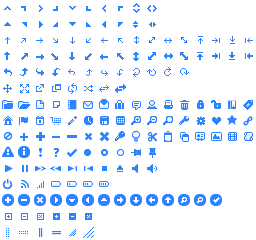
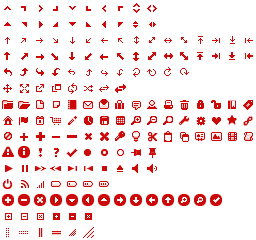
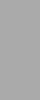
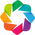
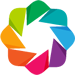
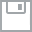
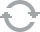
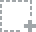
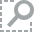
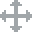
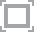
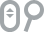

In [19]:
from bokeh.io import output_notebook #for displaying in the notebook

from bokeh.plotting import figure, show, output_file

game_DB2 = game_DB[game_DB.User == "Maniacalbrain"].tail(10)

X0 = [0 for i in range(len(game_DB2))] #starting x position of each segment (all 0s)

#Bokeh doens't seem to work unless given lists

titles = game_DB2["Game"].tolist() 
times = game_DB2["Time Played"].tolist()
    
p1 = figure(title="Maniacalbrain", width=1024, height =20*len(titles),
            y_range=titles, x_range=[0, (max(times)+ ((max(times)/100)*10) ) ]) #x_range from 0 to the largest time + 10% to all for the text to be seen

p1.segment(X0, titles, times, titles, line_width=10 )

p1.text(times, titles, text=times, text_font_size="8pt", 
           text_baseline="middle", text_align="left")

output_notebook()

show(p1)